# HW1- problem 3- Support Vector Machine

Sana Harighi- 98104047


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import cvxopt

### a) General information about dataset

In [26]:
df = pd.read_csv("Heart_Disease_Dataset.csv")

# i) shape of the dataset:
shape = df.shape
print("Shape of the Dataset: " , shape)

Shape of the Dataset:  (1190, 12)


In [27]:
# ii) Check if there is missing entries in the dataset columnwise

missings = df.isnull().values.any()
if missings:
  print("This dataset has missing value")
else:
  print("This dataset doesn't have missing value")

This dataset doesn't have missing value


In [28]:
# iii) Check whether the dataset is balanced or not
# (If the difference between 2 classes was less than 100 for our dataset,it is called ballanced )                                               ##

normal=df.groupby('target').count()._get_value(0, 'age')
anormal=df.groupby('target').count()._get_value(1, 'age')
if np.absolute(normal-anormal) <= 100:
  print("ballanced: True")
else:
  print("ballanced: False")

ballanced: True


--------------------- Plots --------------------------


<ipython-input-29-cf09c9fbc68e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['age'])
<ipython-input-29-cf09c9fbc68e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==1]['age'])
<ipython-input-29-cf09c9fbc68e>:13: UserWarning: 

`distplot` is a deprecated 

<Axes: title={'center': 'gender distirbution for just heart disease patients'}, xlabel='sex'>

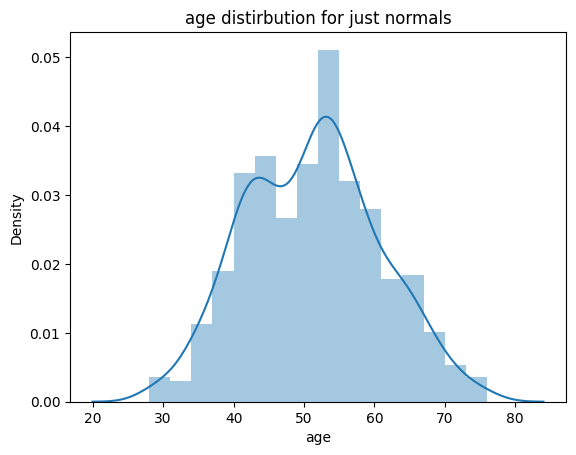

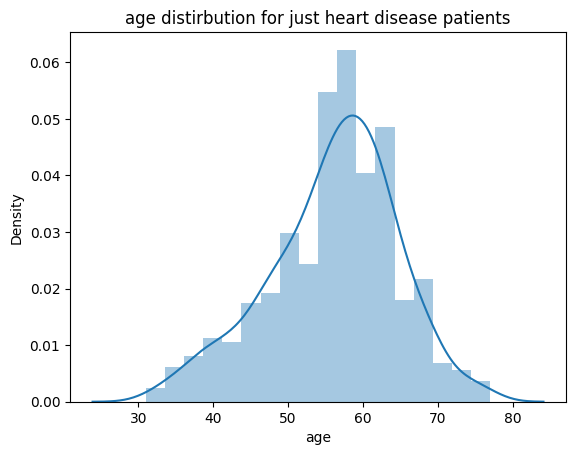

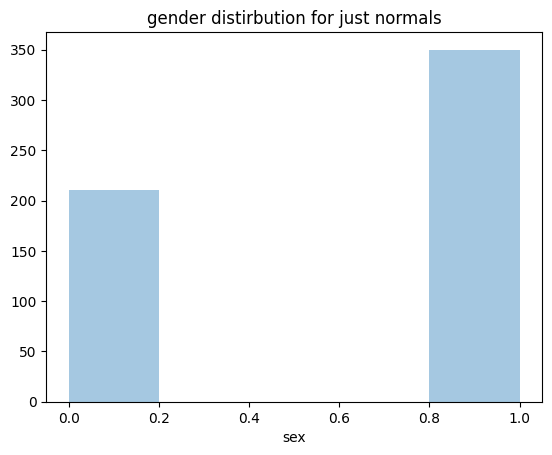

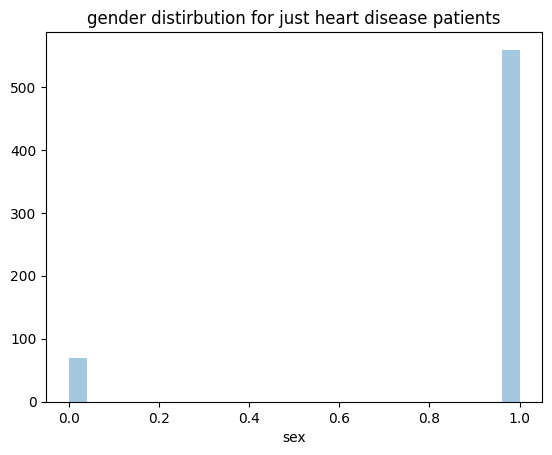

In [29]:
# iv) plot the age distirbution and gender distrbution

print("--------------------- Plots --------------------------")
plt.figure()
plt.title("age distirbution for just normals")
sns.distplot(df[df['target']==0]['age'])
plt.figure()
plt.title("age distirbution for just heart disease patients")
sns.distplot(df[df['target']==1]['age'])

plt.figure()
plt.title("gender distirbution for just normals")
sns.distplot(df[df['target']==0]['sex'],kde=False)
plt.figure()
plt.title("gender distirbution for just heart disease patients")
sns.distplot(df[df['target']==1]['sex'],kde=False)


# b) Remove outliers using Z-test

the outliers are those that the difference between all of their features (in normalized form) and the average of that feature is less than the threshold. Because this shows that they are far in sense of features from average data.

In [30]:
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
m=df.mean()
s=df.std()
df=df[(np.absolute((df['max heart rate']-m['max heart rate'])/s['max heart rate']) < threshold ) &
 (np.absolute((df['cholesterol']-m['cholesterol'])/s['cholesterol']) < threshold ) &
  (np.absolute((df['resting bp s']-m['resting bp s'])/s['resting bp s']) < threshold ) &
   (np.absolute((df['age']-m['age'])/s['age']) < threshold )]


In [31]:
print("Size of the dataset after removing outliers: ",df.shape)

Size of the dataset after removing outliers:  (1173, 12)


## c) Normalize numerical features to be between 0 and 1:


In [32]:
df['age']=(df['age']-df.min()['age'])/(df.max()['age']-df.min()['age'])
df['resting bp s']=(df['resting bp s']-df.min()['resting bp s'])/(df.max()['resting bp s']-df.min()['resting bp s'])
df['cholesterol']=(df['cholesterol']-df.min()['cholesterol'])/(df.max()['cholesterol']-df.min()['cholesterol'])
df['max heart rate']=(df['max heart rate']-df.min()['max heart rate'])/(df.max()['max heart rate']-df.min()['max heart rate'])
df['oldpeak']=(df['oldpeak']-df.min()['oldpeak'])/(df.max()['oldpeak']-df.min()['oldpeak'])


<ipython-input-32-bbe3205d0cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=(df['age']-df.min()['age'])/(df.max()['age']-df.min()['age'])
<ipython-input-32-bbe3205d0cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting bp s']=(df['resting bp s']-df.min()['resting bp s'])/(df.max()['resting bp s']-df.min()['resting bp s'])
<ipython-input-32-bbe3205d0cd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

# d) SVM

0) spliting data

In [33]:
# change dataset labels from 0 and 1, to -1 and 1
df.target.replace(0 , -1 , inplace = True)

df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


<ipython-input-33-17873fdee78d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target.replace(0 , -1 , inplace = True)


In [34]:
def classification_report(y_true, y_pred):
    Accuracy = (y_true == y_pred).sum()/len(y_true)
    Precision = ((y_true==y_pred) & (y_true > 0)).sum()/( ((y_true==y_pred) & (y_true > 0)).sum() +  ((y_true!=y_pred) & (y_pred > 0)).sum() )
    Recall = ((y_true==y_pred) & (y_true > 0)).sum()/( ((y_true==y_pred) & (y_true > 0)).sum() +  ((y_true!=y_pred) & (y_pred < 0)).sum() )
    F1score = 2*(Precision * Recall) / (Precision + Recall)
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1score: ", F1score)


In [35]:
# i) linear kernel
linear_svc = SVC(kernel='linear', C=1)
linear_svc.fit(X_train, y_train)
y_predicted=linear_svc.predict(X_test)
print("------------------results of sklearn svm linear kernel------------------")
classification_report(y_test, y_predicted)

# ii) rbf kernel
rbf_svc = SVC(kernel='rbf', C=8, gamma=18)
rbf_svc.fit(X_train, y_train)
y_predicted=rbf_svc.predict(X_test)
print("------------------results of sklearn svm RBF kernel---------------------")
classification_report(y_test, y_predicted)

# iii) polynomial kernel
polyn_svc = SVC(kernel='poly', C=8, degree=11)
polyn_svc.fit(X_train, y_train)
y_predicted=polyn_svc.predict(X_test)
print("---------------results of sklearn svm polynomial kernel------------------")
classification_report(y_test, y_predicted)


------------------results of sklearn svm linear kernel------------------
Accuracy:  0.7869318181818182
Precision:  0.7756410256410257
Recall:  0.7515527950310559
F1score:  0.7634069400630915
------------------results of sklearn svm RBF kernel---------------------
Accuracy:  0.9403409090909091
Precision:  0.926829268292683
Recall:  0.9440993788819876
F1score:  0.9353846153846155
---------------results of sklearn svm polynomial kernel------------------
Accuracy:  0.8721590909090909
Precision:  0.9202898550724637
Recall:  0.7888198757763976
F1score:  0.8494983277591974
